In [16]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn import metrics
from scipy.stats import zscore
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 

In [69]:
df=pd.read_csv('wisc_bc_data-2.csv')

In [70]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [71]:
df.shape

(569, 32)

In [72]:
df['diagnosis'].replace({'B':0,'M':1},inplace=True)

In [73]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [74]:
df.drop('id',axis=1,inplace=True)

In [75]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis          569 non-null    int64  
 1   radius_mean        569 non-null    float64
 2   texture_mean       569 non-null    float64
 3   perimeter_mean     569 non-null    float64
 4   area_mean          569 non-null    float64
 5   smoothness_mean    569 non-null    float64
 6   compactness_mean   569 non-null    float64
 7   concavity_mean     569 non-null    float64
 8   points_mean        569 non-null    float64
 9   symmetry_mean      569 non-null    float64
 10  dimension_mean     569 non-null    float64
 11  radius_se          569 non-null    float64
 12  texture_se         569 non-null    float64
 13  perimeter_se       569 non-null    float64
 14  area_se            569 non-null    float64
 15  smoothness_se      569 non-null    float64
 16  compactness_se     569 non

In [77]:
df.isnull().sum()

diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [78]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [79]:
stats.shapiro(df['radius_mean'])

ShapiroResult(statistic=0.9410696029663086, pvalue=3.1061551985026026e-14)

In [80]:
for i in df.drop('diagnosis',axis=1).columns:
    print(i)
    print(stats.shapiro(df[i]))

radius_mean
ShapiroResult(statistic=0.9410696029663086, pvalue=3.1061551985026026e-14)
texture_mean
ShapiroResult(statistic=0.9767200946807861, pvalue=7.281473557441132e-08)
perimeter_mean
ShapiroResult(statistic=0.9361826181411743, pvalue=7.01163031715385e-15)
area_mean
ShapiroResult(statistic=0.8584018349647522, pvalue=3.196511088521129e-22)
smoothness_mean
ShapiroResult(statistic=0.987487256526947, pvalue=8.59934589243494e-05)
compactness_mean
ShapiroResult(statistic=0.9169784784317017, pvalue=3.967941392408286e-17)
concavity_mean
ShapiroResult(statistic=0.8668309450149536, pvalue=1.3385831077542155e-21)
points_mean
ShapiroResult(statistic=0.8916499018669128, pvalue=1.4044357116065472e-19)
symmetry_mean
ShapiroResult(statistic=0.972588062286377, pvalue=7.88199550072477e-09)
dimension_mean
ShapiroResult(statistic=0.9232836961746216, pvalue=1.956494436320316e-16)
radius_se
ShapiroResult(statistic=0.7455540895462036, pvalue=1.2245553698549864e-28)
texture_se
ShapiroResult(statistic=0.8

## From above shapiro test we can see most of the data is not normal 

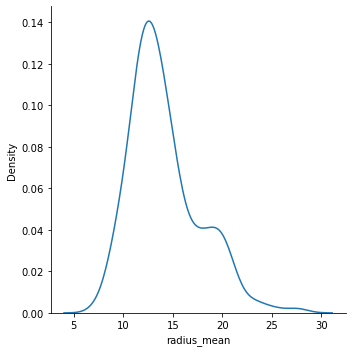

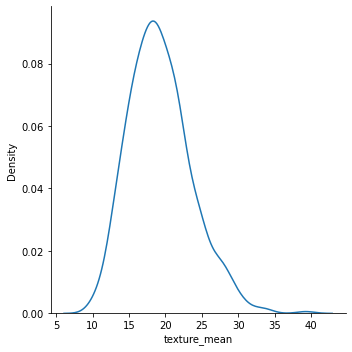

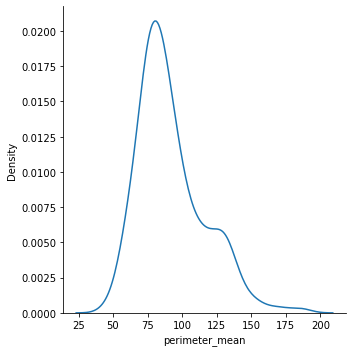

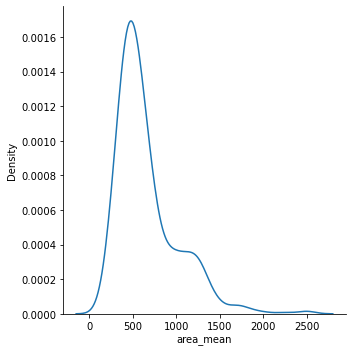

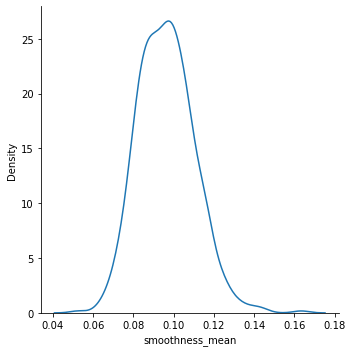

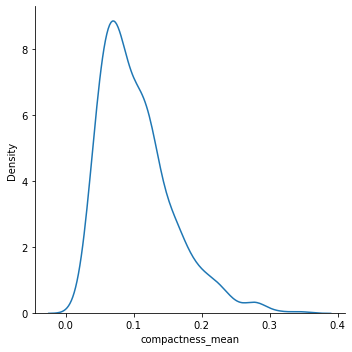

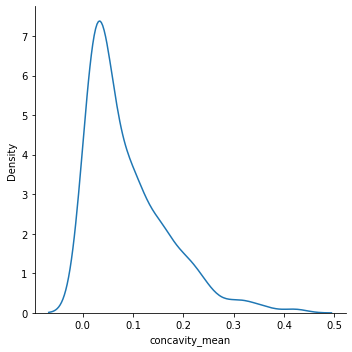

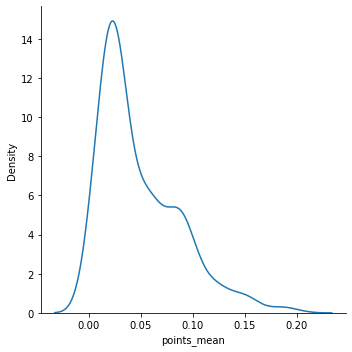

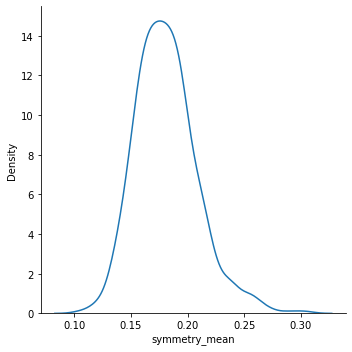

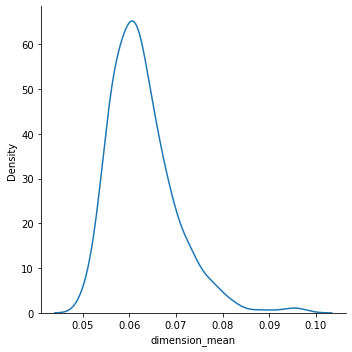

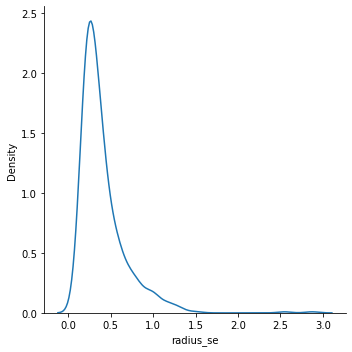

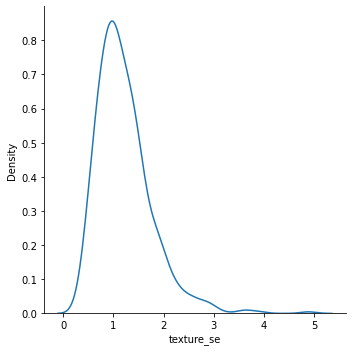

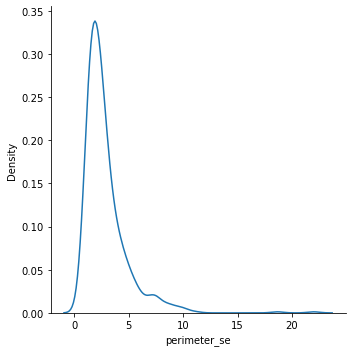

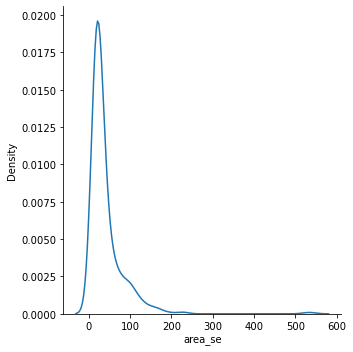

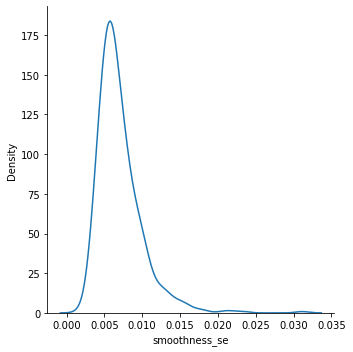

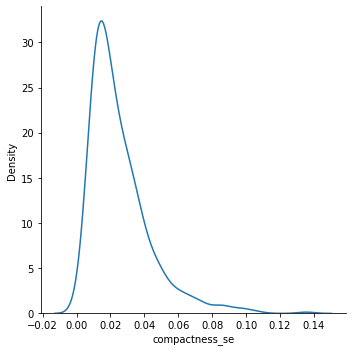

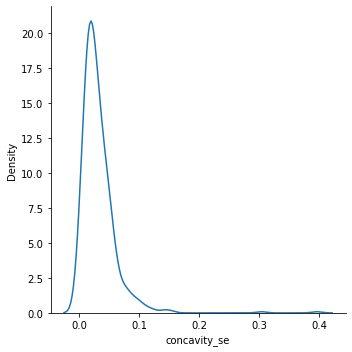

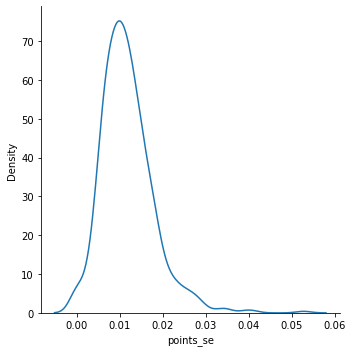

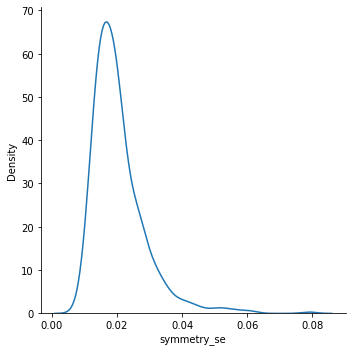

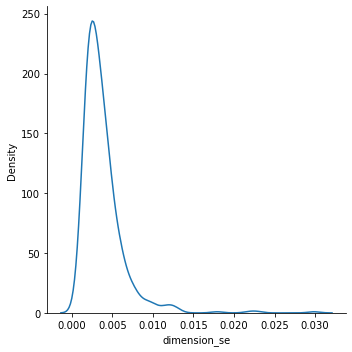

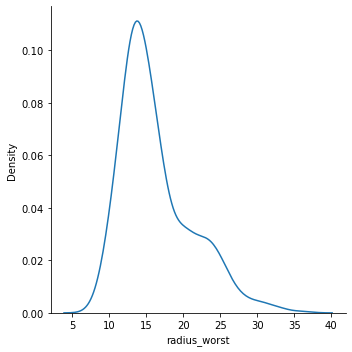

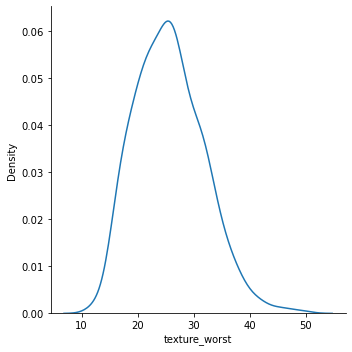

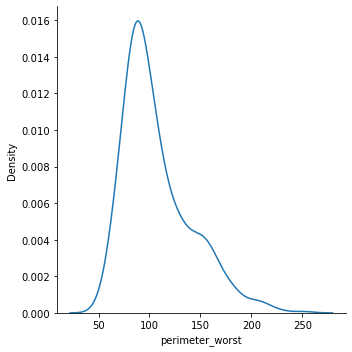

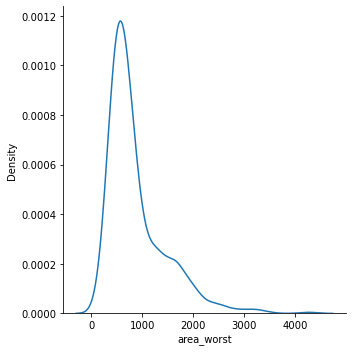

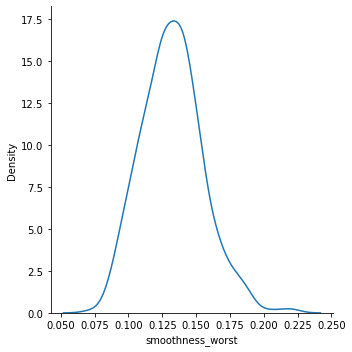

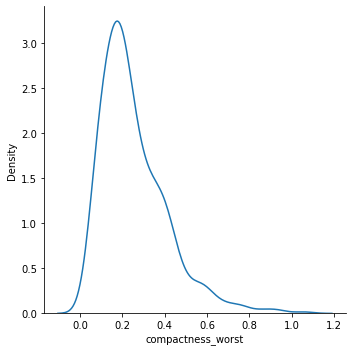

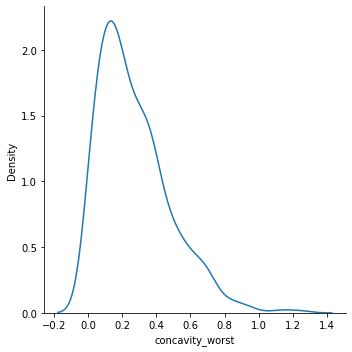

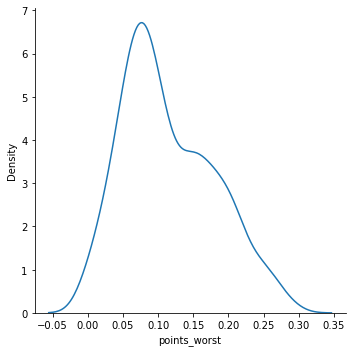

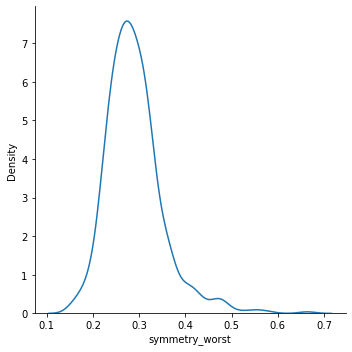

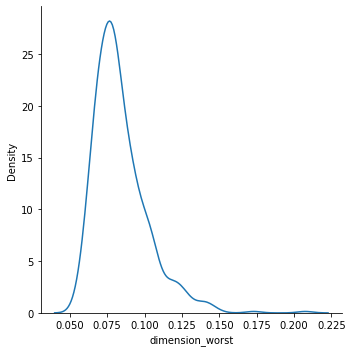

In [26]:
for i in df.drop('diagnosis',axis=1).columns:
    print(sns.displot(df[i],kind='kde'))
    plt.show()

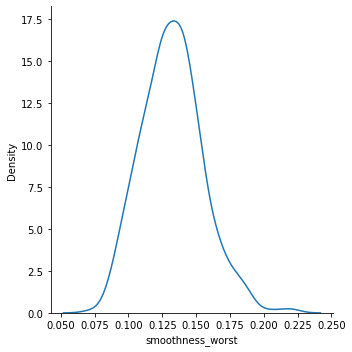

In [27]:
sns.displot(df['smoothness_worst'],kind='kde')

In [28]:
stats.shapiro(df['smoothness_worst'])

ShapiroResult(statistic=0.9886201024055481, pvalue=0.0002097362739732489)

In [81]:
df0=df[df['diagnosis']==0]
df1=df[df['diagnosis']==1]

C:\Users\srava\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\srava\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='radius_mean', ylabel='Density'>

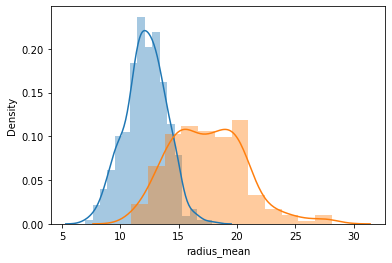

In [82]:
sns.distplot(df0['radius_mean'])
sns.distplot(df1['radius_mean'])

In [83]:
for i in df.drop('diagnosis',axis=1).columns:
    statistic,pvalue=stats.ttest_ind(df0[i],df1[i])
    if pvalue>0.05:
        print(i,pvalue)

dimension_mean 0.7599368037256238
texture_se 0.8433320287670163
smoothness_se 0.11029660865789295
symmetry_se 0.8766418183858812
dimension_se 0.06307355082239346


In [85]:
for i in df.drop('diagnosis',axis=1).columns:
    statistic,pvalue=stats.mannwhitneyu(df0[i],df1[i])
    if pvalue>0.05:
        print(i,pvalue)

dimension_mean 0.26859280106781197
texture_se 0.32184635051298305
smoothness_se 0.10681581660023132


In [86]:
df['symmetry_se']=np.log(df['symmetry_se'])
df['dimension_se']=np.log(df['dimension_se'])


In [87]:
df.shape

(569, 31)

In [88]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [89]:
df_update_0=df[df['diagnosis']==0]
df_update_1=df[df['diagnosis']==1]

In [90]:
stats.ttest_ind(df_update_0['symmetry_se'],df_update_1['symmetry_se'])

Ttest_indResult(statistic=1.2930500073503952, pvalue=0.19652036025569775)

In [91]:
stats.ttest_ind(df_update_0['dimension_se'],df_update_1['dimension_se'])

Ttest_indResult(statistic=-4.0097837029168915, pvalue=6.890519570178426e-05)

## From above test we see even after transformation 'symmetry_se' does not satisfy ttest 

In [99]:
X=df.drop(['diagnosis','texture_se','symmetry_se','dimension_mean','smoothness_se'],axis=1)
X_all=df.drop('diagnosis',axis=1)
X_all.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [100]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.2360,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.4505,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.1967,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.3384,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.1783,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [101]:
Y=df['diagnosis']

In [108]:
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split,KFold

In [109]:
ss=StandardScaler()
X_std=ss.fit_transform(X)

## Logistic regression

In [166]:
lr=LogisticRegression()
kf=KFold(n_splits=5,shuffle=True,random_state=0)
score=cross_val_score(lr,X_std,Y,scoring='roc_auc',cv=kf)

In [167]:
score

array([0.99403299, 0.99932432, 0.99714195, 0.996841  , 0.98956357])

In [128]:
np.mean(score),np.std(score,ddof=1)

(0.9953807664772171, 0.00375639401876975)

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [202]:
X_train_std=ss.fit_transform(X_train)
X_test_std=ss.transform(X_test)

In [203]:
lr_model=lr.fit(X_train_std,y_train)

In [204]:
y_pred=lr_model.predict(X_test_std)

In [205]:
metrics.accuracy_score(y_test,y_pred)

0.9824561403508771

In [206]:
metrics.confusion_matrix(y_test,y_pred)

array([[111,   2],
       [  1,  57]], dtype=int64)

In [207]:
metrics.roc_auc_score(y_test,y_pred)

0.9825297528227037

In [165]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       113
           1       0.97      0.98      0.97        58

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



# Knn

In [115]:
X_all_std=ss.fit_transform(X_all)

In [119]:
knn=KNeighborsClassifier()
param={'n_neighbors':np.arange(1,200),'weights':['uniform','distance']}
kf=KFold(n_splits=5,random_state=0,shuffle=True)
grid=GridSearchCV(knn,param_grid=params,cv=kf,scoring='roc_auc')
grid.fit(X_all_std,Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,...
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 1

In [120]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=14, weights='distance')

In [121]:
grid.best_params_

{'n_neighbors': 14, 'weights': 'distance'}

In [156]:
knn=KNeighborsClassifier(n_neighbors=14,weights='distance')
score=model_selection.cross_val_score(knn,X_all_std,Y,cv=5,scoring='roc_auc')
np.mean(score),np.std(score,ddof=1)

(0.9913186808187628, 0.006547415854954801)

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X_all, Y, test_size=0.3, random_state=0)

In [195]:
X_train_std=ss.fit_transform(X_train)
X_test_std=ss.transform(X_test)

In [196]:
knn=KNeighborsClassifier(n_neighbors=14,weights='distance')
knn_model=knn.fit(X_train_std,y_train)

In [197]:
y_pred=knn_model.predict(X_test_std)

In [198]:
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

0.9590643274853801
[[113   0]
 [  7  51]]
0.9396551724137931
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       113
           1       1.00      0.88      0.94        58

    accuracy                           0.96       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.96      0.96       171



# Navie Bayes

In [129]:
NB=GaussianNB()
score=model_selection.cross_val_score(NB,X_all_std,Y,cv=5,scoring='roc_auc')
np.mean(score),np.std(score,ddof=1)

(0.9826196953469308, 0.01005512795549943)

# Decision Tree

In [130]:
from sklearn.tree import DecisionTreeClassifier

In [135]:
dt=DecisionTreeClassifier()
param={'criterion':['gini','entropy']}
kf=KFold(n_splits=5,random_state=0,shuffle=True)
grid=GridSearchCV(dt,param_grid=param,cv=kf,scoring='roc_auc')
grid.fit(X_all_std,Y)


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']}, scoring='roc_auc')

In [136]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy')

In [137]:
dt=DecisionTreeClassifier(criterion='entropy')
score=model_selection.cross_val_score(dt,X_all_std,Y,cv=5,scoring='roc_auc')
np.mean(score),np.std(score,ddof=1)


(0.9185950977180914, 0.020782487903496367)

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X_all, Y, test_size=0.3, random_state=0)

In [189]:
dt=DecisionTreeClassifier(criterion='entropy')
dt_model=dt.fit(X_train,y_train)

In [190]:
y_pred=dt_model.predict(X_test)

In [191]:
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

0.9239766081871345
[[106   7]
 [  6  52]]
0.9173024107415318
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       113
           1       0.88      0.90      0.89        58

    accuracy                           0.92       171
   macro avg       0.91      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



# Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [141]:
Rf=RandomForestClassifier()
param={'criterion':['gini','entropy'],'n_estimators':np.arange(1,100)}
kf=KFold(n_splits=5,random_state=0,shuffle=True)
grid=GridSearchCV(Rf,param_grid=param,cv=kf,scoring='roc_auc')
grid.fit(X_all_std,Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='roc_auc')

In [142]:
grid.best_params_

{'criterion': 'entropy', 'n_estimators': 24}

In [147]:
Rf=RandomForestClassifier(criterion= 'entropy', n_estimators= 24)
kf=KFold(shuffle=True,n_splits=5,random_state=0)
score=model_selection.cross_val_score(Rf,X_all_std,Y,cv=kf,scoring='roc_auc')
np.mean(score),np.std(score,ddof=1)


(0.9875136456569337, 0.009058927096120188)

In [199]:
Rf=RandomForestClassifier(criterion= 'entropy', n_estimators= 24)
X_train, X_test, y_train, y_test = train_test_split(X_all, Y, test_size=0.3, random_state=0)
Rf_model=Rf.fit(X_train,y_train)

In [200]:
y_pred=Rf_model.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

0.9766081871345029
[[113   0]
 [  4  54]]
0.9655172413793103
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       113
           1       1.00      0.93      0.96        58

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

